### Problem 1
Simulate different non-linear models. Three good models to start out with
are: SETAR(2;1;1), IGAR(2;1), and MMAR(2;1). Try different parameters.
For reporting, write the models and discuss the most essential features of
each model together with some informative plots.
Hints
R and Matlab: Check out the script 3dPlotting.R. It starts out showing a
simple way to implement a simulation of a process with a for-loop.

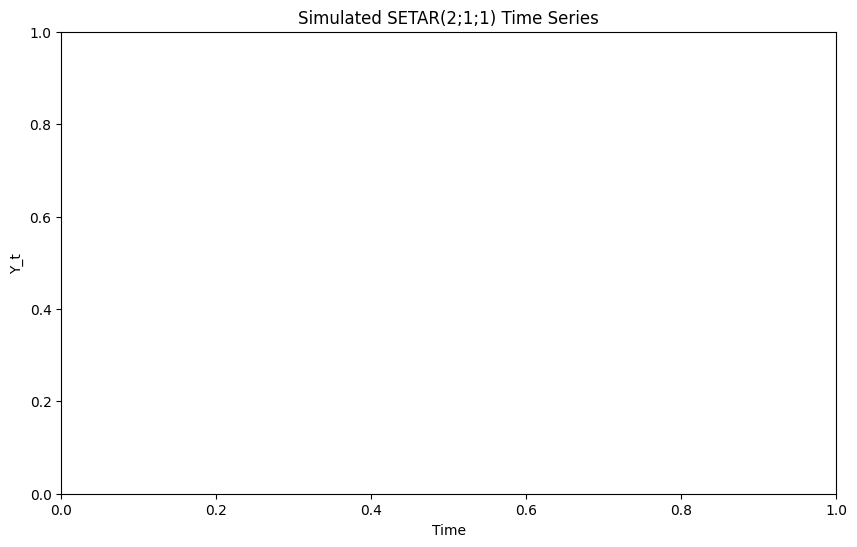

In [6]:
# Simulate SETAR(2;1;1) with different parameters and plot the results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
a_0_1 = -2
a_1_1 = 0.5
a_0_2 = 2
a_1_2 = 0.35

n = 10000
Y = np.zeros(n)
for t in range(1, n):
    if Y[t-1] < 0:
        Y[t] = a_0_1 + a_1_1* Y[t-1] + np.random.normal()
    else:
        Y[t] = a_0_2 + a_1_2 * Y[t-1] + np.random.normal()
df = pd.DataFrame(Y, columns=['Value'])
plt.figure(figsize=(10, 6))
plt.title('Simulated SETAR(2;1;1) Time Series')
plt.xlabel('Time')
plt.ylabel('Y_t')
plt.show()

### Simulation of IGAR(2; 1) model

#### Model:

$X_t = a_0^{J_t} + \Sigma_{i=1}^{k_{J_{t}}} a_i^{J_t}X_{t-i} + \varepsilon_t^{(J_t)}$

1000


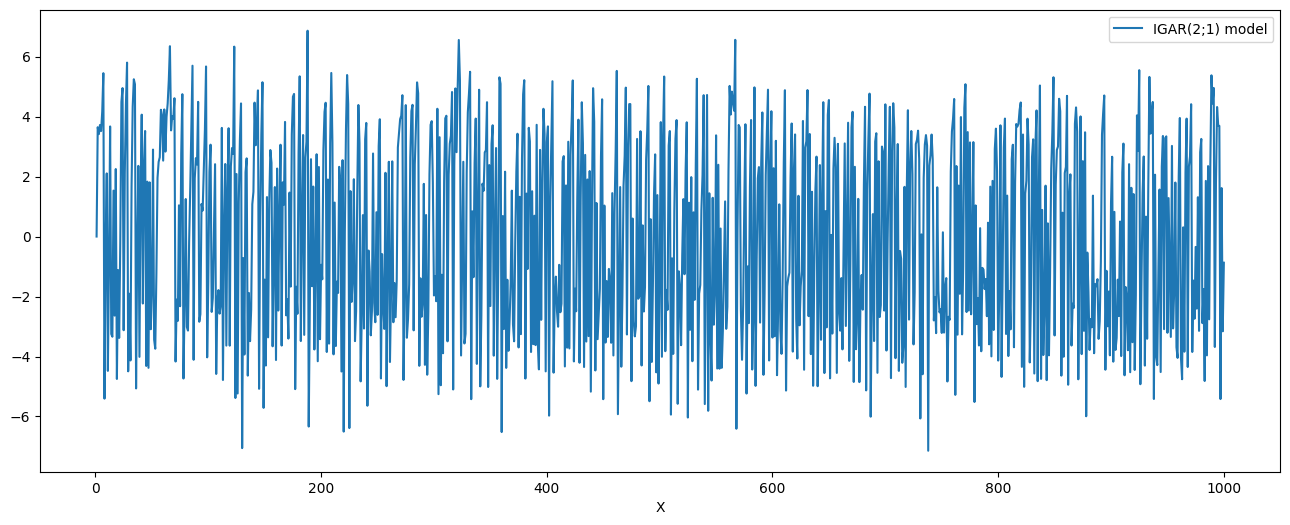

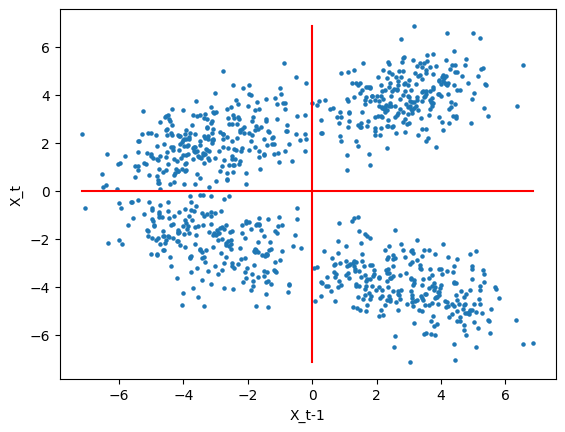

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a_00 = 3
a_01 = 0.3
a_10 = -3
a_11 = -0.3
a = [[a_00, a_01], [a_10, a_11]]
p_1 = 0.5 # probability p_1
p_2 = 1 - p_1 # probability p_2

J_t_prob = [p_1, p_2]
J_t_values = [i for i in range(len(J_t_prob))]
n = 1000
t_vec = [i + 1 for i in range(n)]
print(len(t_vec))
X = [0]

# Random variable addition parameters
mu = 0
sigma = 1


for t in range(1, n):

    J_t = random.uniform(0, 1)
    epsilon_t = np.random.normal(mu, sigma)

    for probability_idx in range(len(J_t_prob)):
        if probability_idx == len(J_t_prob) - 1:
            if J_t > J_t_prob[-1]:
                J_t_val = J_t_values[probability_idx]
        elif probability_idx == 0:
            if J_t < J_t_prob[0]:
                J_t_val = J_t_values[probability_idx]
        else:
            if J_t > sum(J_t_prob[ : probability_idx]) and J_t > sum(J_t_prob[ : probability_idx + 1]):
                J_t_val = J_t_values[probability_idx]

    # Appending new values    
    X_t = a[J_t_val][0] + a[J_t_val][1] * X[-1] + epsilon_t
    X.append(X_t)



    

plt.figure(figsize=(16, 6))
plt.plot(t_vec, X, label = "IGAR(2;1) model")
plt.legend()
plt.xlabel('t')
plt.xlabel('X')
plt.show()

# Plot of lag 1

plt.figure()
plt.scatter(X[ : -1], X[1 : ], s=5)
plt.plot(np.linspace(min(X), max(X), n), np.zeros(n), color = "red")
plt.plot(np.zeros(n), np.linspace(min(X), max(X), n), color = "red")
plt.xlabel('X_t-1')
plt.ylabel('X_t')
plt.show()

# Correlation Sample ACF
max_lag = 10



### Part 2

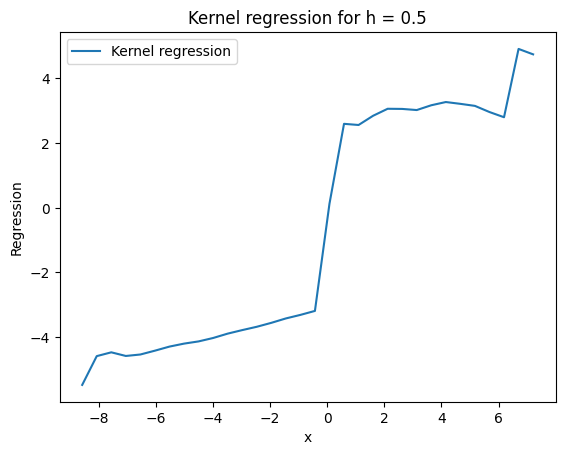

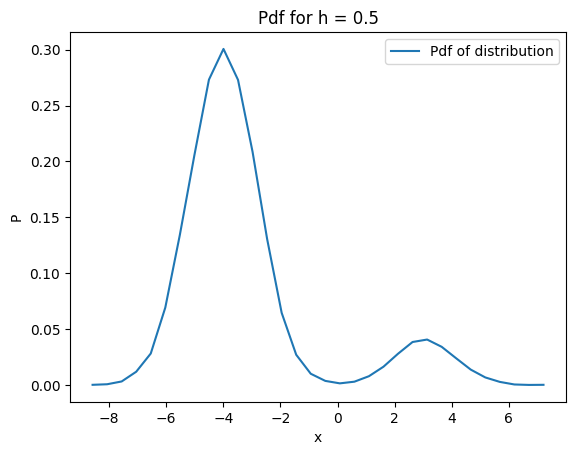

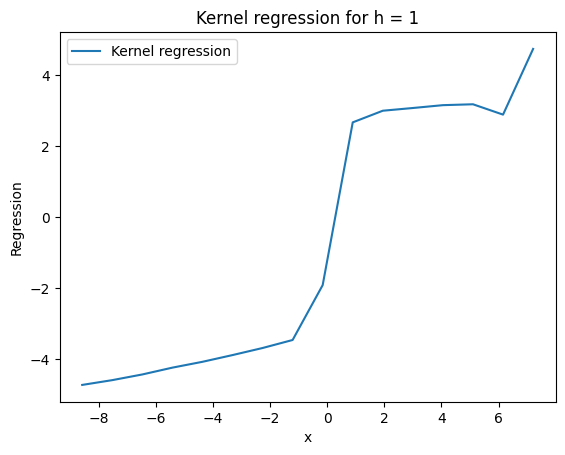

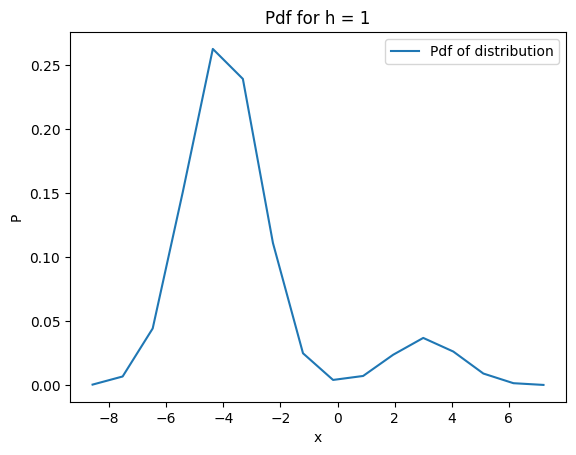

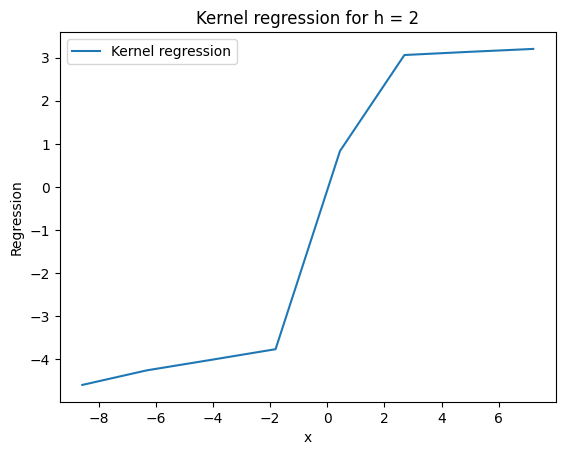

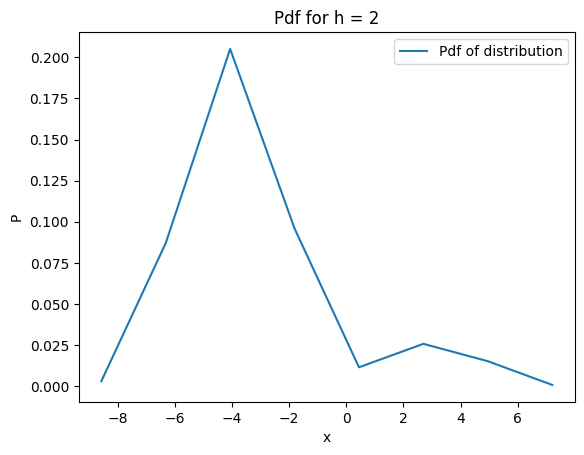

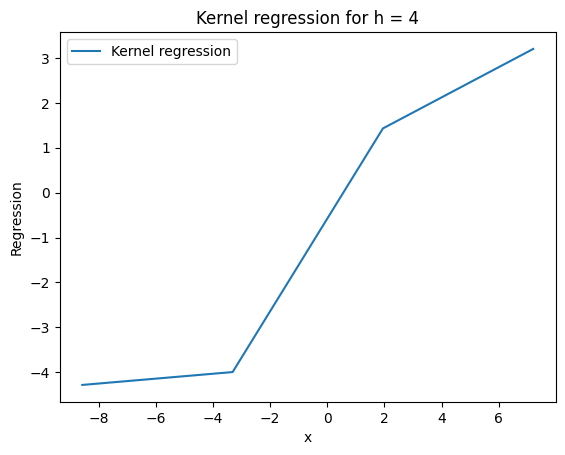

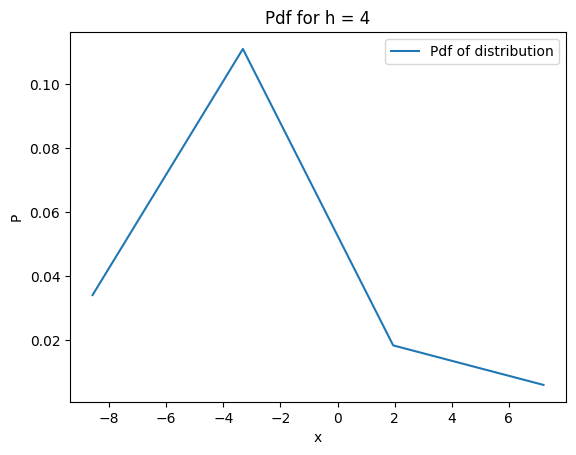

In [8]:
# Data
X = np.array(df['Value'])

# Defining parameters
N = len(X)
h = 2


def kernel(u):
    if u > -1 and u <= 1:
        return 1 / 2
    else:
        return 0

def plot_kernel_reg_and_pdf(h):
    # Defining the kernel regression and distribution parameters
    f = []
    f_distribution = []
    interval = np.linspace(min(X), max(X), int(np.round((max(X) - min(X)) / h)))
    for idx, y in enumerate(interval):
        f_val_denom = 0
        f_val_numer = 0
        for X_t_idx, X_t in enumerate(X[1 : ]):
            f_val_denom += 1 / (N * h) * kernel((y - X[X_t_idx - 1]) / h)
            f_val_numer += 1 / (N * h) * kernel((y - X[X_t_idx - 1]) / h) * X_t
        
        f_total = f_val_numer / f_val_denom
        f_distribution.append(f_val_denom)
        f.append(f_total)

    # Kernel regression function of SETAR model data
    plt.figure()
    plt.plot(interval, f, label = "Kernel regression")
    plt.xlabel("x")
    plt.ylabel("Regression")
    plt.title(f"Kernel regression for h = {h}")
    plt.legend()
    plt.show()

    # Probability density function of SETAR model increments
    plt.figure()
    plt.plot(interval, f_distribution, label = "Pdf of distribution")
    plt.xlabel("x")
    plt.ylabel("P")
    plt.title(f"Pdf for h = {h}")
    plt.legend()
    plt.show()

h_list = [0.5, 1, 2, 4]

for h in h_list:
    plot_kernel_reg_and_pdf(h)


### Part 3

## Part 4

In [9]:
# We want the parameters, theta(X) to be varying as a function of wind speed, while we have the relationship for the heat coefficient, we create a weight model that we parametrize

# Algorithm:
# 1. Define an interval we want to compute the regression on (wind speed min and max)
# 2. Define the function, where each step of the function is calculated, 1 / N * sum(kernel(wind speed) * (Ua - relationship * theta(wind speed)))
# 3. Theta(wind speed(w)) = theta_0 + theta_1 * w + theta_2 * w ** 2
# 4. Minimize the loss based on theta 

"""
# Global polynomial
from scipy.optimize import minimize
import numpy as np

# Define the weight function
def kernel(x):
    return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)

# Get the interval that the function is estimated over
nr_data = 1000
w_span = np.linspace(min(df['W']), max(df['W']), nr_data) # Linear regression of the interval we are estimating the function in

# Define the loss function that we are trying to minimize
def loss(data, theta_params, w_span, h = 0.5):
    total_loss = 0
    for w in w_span:
        total_loss += 1 / len(data) * sum(kernel((w - data['W']) / h ) * (data['U_a'] - (data['Ph'] / (data['Ti'] - data['Te'])) * theta(w, theta_params)) ** 2)
    print(f'The total loss is {total_loss}')
    return total_loss

# Define the varying parameters
def theta(x, theta_param):
    powers = np.arange(len(theta_param))
    return np.sum(theta_param * x**powers)

def optimization(polynomial_degree, w_span, data):
    theta_0 = np.zeros(polynomial_degree + 1)
    result = minimize(lambda theta_params: loss(data, theta_params, w_span), theta_0, options={'maxiter': 50, 'disp': True, 'gtol': 1e-6}) # Add constaints to the optimization since it is trying to model a stocahstic process
    return result.x

final_weights = optimization(2, w_span, df)
print(final_weights)

plt.figure()
plt.scatter(df['W'], (df['Ph'] / (df['Ti'] - df['Te'])) * pd.Series([theta(w, final_weights) for w in np.linspace(min(df['W']), max(df['W']), len(df['W']))]), label='Estimated function', s = 10, color = "red")
plt.scatter(df['W'], df['U_a'], label = "Exact function", s = 5, color = "blue")
plt.xlabel('Wind speed')
plt.ylabel('Heat loss coefficient')
plt.legend()
plt.grid('on')
plt.show()
"""

'\n# Global polynomial\nfrom scipy.optimize import minimize\nimport numpy as np\n\n# Define the weight function\ndef kernel(x):\n    return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)\n\n# Get the interval that the function is estimated over\nnr_data = 1000\nw_span = np.linspace(min(df[\'W\']), max(df[\'W\']), nr_data) # Linear regression of the interval we are estimating the function in\n\n# Define the loss function that we are trying to minimize\ndef loss(data, theta_params, w_span, h = 0.5):\n    total_loss = 0\n    for w in w_span:\n        total_loss += 1 / len(data) * sum(kernel((w - data[\'W\']) / h ) * (data[\'U_a\'] - (data[\'Ph\'] / (data[\'Ti\'] - data[\'Te\'])) * theta(w, theta_params)) ** 2)\n    print(f\'The total loss is {total_loss}\')\n    return total_loss\n\n# Define the varying parameters\ndef theta(x, theta_param):\n    powers = np.arange(len(theta_param))\n    return np.sum(theta_param * x**powers)\n\ndef optimization(polynomial_degree, w_span, data):\n    theta_

In [29]:
import numpy as np
import pandas as pd 
from scipy.optimize import minimize

df = pd.read_csv('/Users/03mare02/Documents/GitHub/advanced_time_series_analysis/DataPart4.csv')
df['U_a'] = df['Ph'] / (df['Ti'] - df['Te'])
print(df.head())

            Ph         Ti         Te         W         U_a
0  1496.970334  20.002530  12.255610  8.678768  193.234261
1  1411.792178  19.957051  12.298405  7.185271  184.339658
2  1368.595696  19.904727  12.576470  6.684292  186.755957
3  1404.547674  19.886161  12.455047  7.702868  189.009055
4  1376.436161  19.908530  12.638600  7.047383  189.332786


[[ 1.         -8.30536076 68.97901734]
 [ 1.         -6.81186431 46.40149538]
 [ 1.         -6.31088499 39.8272693 ]
 ...
 [ 1.         -1.56923756  2.46250652]
 [ 1.         -1.67047524  2.79048751]
 [ 1.         -0.76189508  0.58048412]]
[[ 1.         -8.30536076 68.97901734]
 [ 1.         -6.81186431 46.40149538]
 [ 1.         -6.31088499 39.8272693 ]
 ...
 [ 1.         -1.56923756  2.46250652]
 [ 1.         -1.67047524  2.79048751]
 [ 1.         -0.76189508  0.58048412]]
[[ 1.         -8.30536076 68.97901734]
 [ 1.         -6.81186431 46.40149538]
 [ 1.         -6.31088499 39.8272693 ]
 ...
 [ 1.         -1.56923756  2.46250652]
 [ 1.         -1.67047524  2.79048751]
 [ 1.         -0.76189508  0.58048412]]
[[ 1.         -8.30536076 68.97901734]
 [ 1.         -6.81186431 46.40149538]
 [ 1.         -6.31088499 39.8272693 ]
 ...
 [ 1.         -1.56923756  2.46250652]
 [ 1.         -1.67047524  2.79048751]
 [ 1.         -0.76189508  0.58048412]]
[[ 1.         -8.30536076 68.97901734]
 

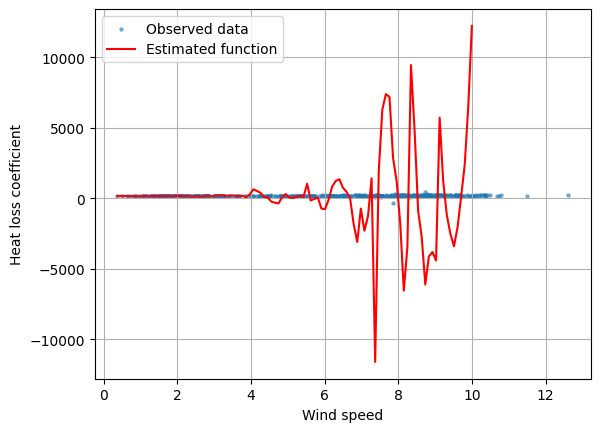

'\nplt.figure()\n# plt.scatter(df[\'W\'], (df[\'Ph\'] / (df[\'Ti\'] - df[\'Te\'])) * pd.Series([theta(w, final_weights) for w in np.linspace(min(df[\'W\']), max(df[\'W\']), len(df[\'W\']))]), label=\'Estimated function\', s = 10, color = "red")\nplt.scatter(df[\'W\'], df[\'U_a\'], label = "Exact function", s = 5, color = "blue")\ntheta_values = np.array(theta_values)\nX_avg = (df[\'Ph\'].mean() / (df[\'Ti\'].mean() - df[\'Te\'].mean()))\nestimated_function = theta_values * X_avg\nplt.plot(w_span, estimated_function, color=\'red\', label=\'Estimated function\')\nplt.xlabel(\'Wind speed\')\nplt.ylabel(\'Heat loss coefficient\')\nplt.legend()\nplt.grid(\'on\')\nplt.show()\n'

In [ ]:
# Final function, only work on this



# Define the weight function
def kernel(x):
    return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)

# Get the interval that the function is estimated over
nr_data = 20
w_span = np.linspace(min(df['W']), 10, nr_data) # Linear regression of the interval we are estimating the function in

# Define the loss function that we are trying to minimize
def loss(data, theta_params, w, h = 1):    
    return 1 / len(data) * sum(kernel((w - data['W']) / h ) * (
    (
    data['Ph'] / (data['Ti'] - data['Te']
    )
    ) - 
    theta((w - data['W']), theta_params)
    ) ** 2
    )

# Define the varying parameters
def theta(w, theta_param):
    # Compute the powers of the polynomial
    powers = np.arange(len(theta_param))
    # Compute the polynomail variable terms, the difference
    w_powers = np.power.outer(w.values, powers)
    
    prod = np.dot(w_powers, theta_param)
    return pd.Series(prod) # Compute the sum of all polynomial terms

def optimization(polynomial_degree, w_span, data):
    theta_0 = np.zeros(polynomial_degree + 1)
    theta_params_all = []
    for w in w_span:

        # Optimization to find the local coefficients
        result = minimize(lambda theta_params: loss(data, theta_params, w), theta_0) #, options={'maxiter': 100, 'disp': True, 'gtol': 1e-6}) # Add constaints to the optimization since it is trying to model a stocahstic process
        # Storing all the parameters
        theta_params_all.append(result.x)
    return np.array(theta_params_all)

polynomial_degree = 2
theta_params_all = optimization(polynomial_degree, w_span, df)


plt.figure()
plt.scatter(df['W'], df['U_a'], s=5, alpha=0.5, label="Observed data")
"""
# Want to write the following process in one list loop
output = []
for w_idx, w in enumerate(w_span):
    sum = 0
    for power, theta_val in enumerate(theta_params_all[w_idx]):
        sum += theta_val * w ** power
    output.append(sum)
"""
output_w = [sum(theta_val * w ** power for power, theta_val in enumerate(theta_params_all[w_idx])) for w_idx, w in enumerate(w_span)]
plt.plot(w_span, output_w, color='red', label="Estimated function")
plt.xlabel('Wind speed')
plt.ylabel('Heat loss coefficient')
plt.legend()
plt.grid(True)
plt.show()

"""
plt.figure()
# plt.scatter(df['W'], (df['Ph'] / (df['Ti'] - df['Te'])) * pd.Series([theta(w, final_weights) for w in np.linspace(min(df['W']), max(df['W']), len(df['W']))]), label='Estimated function', s = 10, color = "red")
plt.scatter(df['W'], df['U_a'], label = "Exact function", s = 5, color = "blue")
theta_values = np.array(theta_values)
X_avg = (df['Ph'].mean() / (df['Ti'].mean() - df['Te'].mean()))
estimated_function = theta_values * X_avg
plt.plot(w_span, estimated_function, color='red', label='Estimated function')
plt.xlabel('Wind speed')
plt.ylabel('Heat loss coefficient')
plt.legend()
plt.grid('on')
plt.show()
"""

### Part 4, varying coefficient model


